In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 78
0,0,0,0,0,2.798293,0.769563,-0.528015,1.951881,-0.431077,-0.641827,...,0,0,0,1,0,0,3.461500,599.0,612.000000,13.000000
1,1,1,1,1,0.055436,-0.361432,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.600000,530.0,600.000000,70.000000
2,2,2,2,2,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,...,0,0,0,1,0,0,3.500000,595.0,665.000000,70.000000
3,3,3,3,3,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,...,0,0,0,1,0,0,4.600000,650.0,699.500000,49.500000
4,4,4,4,4,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.520000,520.0,600.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,214,214,214,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,2.843071,570.0,605.000000,35.000000
206,206,215,215,215,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,2.762000,562.0,600.166667,38.166667
207,207,216,216,216,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,2.712000,549.0,588.166667,39.166667
208,208,217,217,217,-0.423738,-0.631411,-0.201566,-0.304661,-0.085945,-0.600008,...,0,0,0,0,0,0,2.000000,523.0,583.000000,60.000000


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:45<00:00, 26.89s/it]

0.3335200892857143 1 7 27


In [5]:
ET_regr = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=7,
                                            random_state=27)
            
ET_regr.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, ET_Y_pred_d)
print(r2)

0.4530356947047671


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 44, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:49<00:00,  9.97s/it]

0.3442366071428571 17 3 27


In [7]:
DT_regr = DecisionTreeRegressor(max_depth=17,
                                max_features=3,
                                random_state=27)
            
DT_regr.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, DT_Y_pred_d)
print(r2)

0.4105864730383968


### 3D. Random Forest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 27)):
    for j in range(1, 27):
        for k in range(2, 46, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [15:17<00:00, 35.29s/it]

0.35396037946428577 17 2 12


In [8]:
RF_regr = RandomForestRegressor(max_depth=17, 
                                            n_estimators=2, 
                                            max_features=12,
                                            random_state=45)
RF_regr.fit(X_train_d, np.ravel(Y_train_d))
RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, RF_Y_pred_d)
print(r2)

0.4115163926131241


### 4D. K Neighbors

In [8]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:26<00:00,  1.47it/s]

0.4790870535714285 1 3


In [11]:
KNN_reg_d = KNeighborsRegressor(n_neighbors=1, 
                                      p=3).fit(X_train_d, np.ravel(Y_train_d))

KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

r2 = r2_score(Y_test_d, KNN_Y_pred_d)
print(r2)

-0.1052870523241809


In [12]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_d, np.ravel(Y_train_d))
            
GB_Y_pred_d = GB_regr.predict(X_test_d)
            
GB_mae = mean_absolute_error(Y_test_d, GB_Y_pred_d)

r2=r2_score(Y_test_d, GB_Y_pred_d)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 0.463 R2=  0.07110852268950285


In [13]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_d, np.ravel(Y_train_d))

B_Y_pred = B_regr.predict(X_test_d)
           
B_mae = mean_absolute_error(Y_test_d, B_Y_pred)
r2 = r2_score(Y_test_d, B_Y_pred)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 0.493 r2 =  0.08584723692002938


### Saving Decision Tree model

In [18]:
ET_regr_d = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=7,
                                            random_state=27)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_ExtraTrees.joblib")

['./model_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:56<00:00, 27.34s/it]

12.973958334374998 2 10 26


In [14]:
ET_regr_e = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=10,
                                            random_state=26)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, ET_Y_pred_e)
print(r2)

0.7314669645317229


### 2E. Decision Trees

In [10]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:01<00:00,  8.34s/it]

12.83767361666666 21 22 54


In [16]:
DT_regr_e = DecisionTreeRegressor(max_depth=21,
                                max_features=22,
                                random_state=54)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, DT_Y_pred_e)
print(r2)

0.7606000290207602


### 3E. Random Forest

In [11]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 26)):
    for j in range(1, 26):
        for k in range(2, 46, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 25/25 [12:47<00:00, 30.70s/it]

14.276475698177087 16 2 44


In [17]:
RF_regr_e = RandomForestRegressor(max_depth=16, 
                                            n_estimators=2, 
                                            max_features=44,
                                            random_state=45)
RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, RF_Y_pred_e)

print(r2)

0.7403715946157541


### 4E. K Neighbors

In [12]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:26<00:00,  1.46it/s]

14.78125 1 1


In [18]:
KNN_reg_e = KNeighborsRegressor(n_neighbors=1, 
                                      p=1).fit(X_train_e, np.ravel(Y_train_e))

KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

r2 = r2_score(Y_test_e, KNN_Y_pred_e)
print(r2)

0.7141332238613352


In [19]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_e, np.ravel(Y_train_e))

B_Y_pred_e = B_regr.predict(X_test_e)
           
B_mae = mean_absolute_error(Y_test_e, B_Y_pred_e)
r2 = r2_score(Y_test_e, B_Y_pred_e)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 21.612 r2 =  0.5110048286197383


In [20]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_e))
            
GB_Y_pred_e = GB_regr.predict(X_test_e)
            
GB_mae = mean_absolute_error(Y_test_e, GB_Y_pred_e)

r2=r2_score(Y_test_e, GB_Y_pred_e)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 18.683 R2=  0.5917802437451412


### Saving Extra Trees model

In [39]:
DT_regr_e = DecisionTreeRegressor(max_depth=21,
                                max_features=22,
                                random_state=54)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

joblib.dump(DT_regr_e, "./model_SO_emission_DecisionTree.joblib")

['./model_SO_emission_DecisionTree.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [13]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [14:39<00:00, 30.34s/it]

17.24776785714286 7 19 38


In [21]:
ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=25,
                                            random_state=11)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, ET_Y_pred_a)
r2

0.4581834364236903

### 2A. Decision Trees


In [14]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 58, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:09<00:00,  6.52s/it]

20.064930555555556 15 18 32


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=15,
                                max_features=18,
                                random_state=32).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.5802365745049984 ; MSE: 1114.3458198645524 ; RMSE: 33.38181870217009 ; MAE: 20.064930555555556


### 3A. Random Forest

In [15]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 26)):
    for j in range(1, 26):
        for k in range(2, 46, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 25/25 [17:08<00:00, 41.15s/it]

20.58333333333333 18 3 40


In [24]:
RF_regr_a = RandomForestRegressor(max_depth=18, 
                                            n_estimators=3, 
                                            max_features=40,
                                            random_state=45)
RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, RF_Y_pred_a)
r2

0.6062845830883223

### 4A. K Neighbors

In [16]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:29<00:00,  1.33it/s]

23.84375 1 1


In [25]:
KNN_reg_a = KNeighborsRegressor(n_neighbors=1, 
                                      p=1).fit(X_train_a, np.ravel(Y_train_a))

KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

r2 = r2_score(Y_test_a, KNN_Y_pred_a)
r2

0.5470990584532756

In [26]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_a))
            
GB_Y_pred_a = GB_regr.predict(X_test_a)
            
GB_mae = mean_absolute_error(Y_test_a, GB_Y_pred_a)

r2=r2_score(Y_test_a, GB_Y_pred_a)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 20.657 R2=  0.6091372948529918


In [27]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=22),
                                      n_estimators=10,
                                      random_state=20)
B_regr.fit(X_train_a, np.ravel(Y_train_a))

B_Y_pred_a = B_regr.predict(X_test_a)
           
B_mae = mean_absolute_error(Y_test_a, B_Y_pred_a)
r2 = r2_score(Y_test_a, B_Y_pred_a)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 25.308 r2 =  0.49340443472914286


### Saving model

In [40]:
ET_regr_a = ExtraTreesRegressor(n_estimators=7, 
                                max_features=19,
                                random_state=38)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_DecisionTree.joblib")

['./model_SO_abs_DecisionTree.joblib']

## Analyzing

In [41]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=7,
                                            random_state=27)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission
DT_regr_e = DecisionTreeRegressor(max_depth=21,
                                max_features=22,
                                random_state=54)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = DT_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
E_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=7, 
                                max_features=19,
                                random_state=38)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.453036                0.33352              0.246604                   0.496593
Absorption  0.65499                17.2478             915.897                     30.2638
Emission    0.7606                 12.8377             472.219                     21.7306


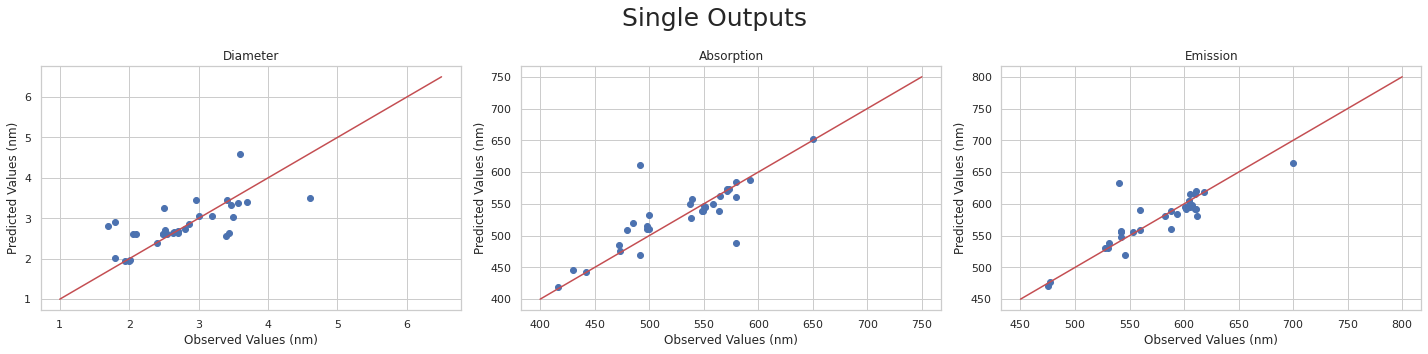

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, DT_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [27]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('time_min', 0.31500062277847524),
 ('x7_zinc chloride', 0.11950649567451058),
 ('temp_c', 0.1118500324443521),
 ('x0_indium trifluoroacetate', 0.04679463909177305),
 ('in_amount_mmol', 0.035929734893865146),
 ('x3_trioctylphosphine', 0.035808521931827424),
 ('x7_zinc oleate', 0.03163483150667729),
 ('p_amount_mmol', 0.027968062953970235),
 ('x8_water', 0.026447841828442363),
 ('x7_zinc octanoate', 0.025237709277970873),
 ('TOP_amount_mmol', 0.024226802836829812),
 ('total_volume_ml', 0.023663021227667887),
 ('x0_chloroindium oxalate', 0.022219984064215104),
 ('x1_tris(dimethylamino)phosphine', 0.017150196446226805),
 ('x8_copper bromide', 0.016500239203986793),
 ('x2_octadecene', 0.0160388400689317),
 ('x7_None', 0.011570808781401818),
 ('x5_None', 0.011009064169240265),
 ('x0_indium chloride', 0.009353737601545675),
 ('sol_amount_ml', 0.008196906774017335),
 ('x8_None', 0.008056027653600655),
 ('x5_octylamine', 0.00793820074139937),
 ('amine_amount_mmol', 0.006491157604181191),
 ('x

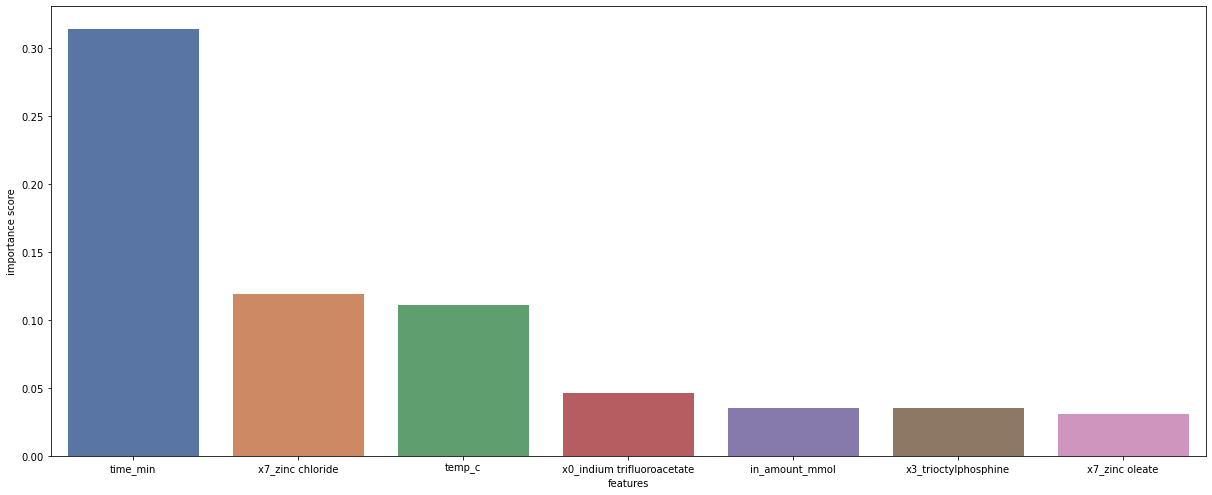

In [28]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [29]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = DT_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('TOP_amount_mmol', 0.2520238767239726),
 ('temp_c', 0.18629026176012012),
 ('time_min', 0.12027970355695149),
 ('zinc_amount_mmol', 0.09527353730033014),
 ('x4_None', 0.05462677652971297),
 ('x7_zinc chloride', 0.045160765660723995),
 ('other_amount_mmol', 0.033434097928717765),
 ('in_amount_mmol', 0.03302125746265394),
 ('amine_amount_mmol', 0.03253214160552061),
 ('total_volume_ml', 0.024935064058292447),
 ('sol_amount_ml', 0.01992867785750177),
 ('acid_amount_mmol', 0.01360344215146883),
 ('x5_hexadecylamine', 0.012264411836113653),
 ('x8_copper bromide', 0.011164389459216034),
 ('x7_zinc iodide', 0.010351517774204762),
 ('x0_indium acetate', 0.010347591893227927),
 ('x7_zinc bromide', 0.0067373258491038365),
 ('p_amount_mmol', 0.006326971480755663),
 ('x0_indium chloride', 0.005500057278760352),
 ('x0_indium myristate', 0.005366236537367086),
 ('x1_tris(trimethylgermyl)phosphine', 0.003609885553699363),
 ('x4_myristic acid', 0.0033588500560619936),
 ('x3_trioctylphosphine', 0.003

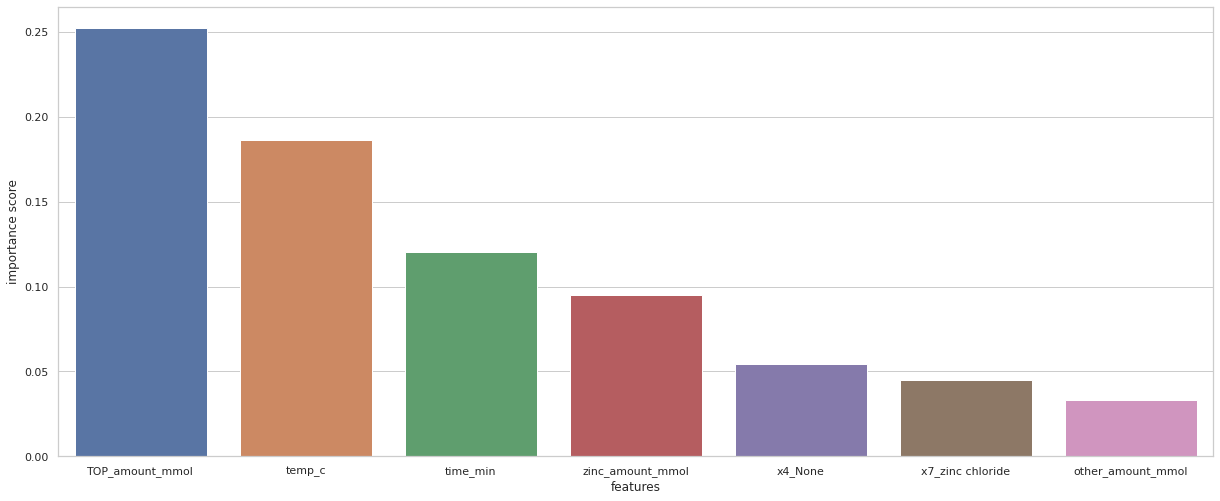

In [30]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [31]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.16034179765316162),
 ('x8_trioctylphosphine oxide', 0.087370043946599),
 ('time_min', 0.07744180817991043),
 ('x5_octylamine', 0.04998053542309751),
 ('in_amount_mmol', 0.03502085759244984),
 ('x7_zinc iodide', 0.034939401657685006),
 ('x7_None', 0.031141347733727905),
 ('zinc_amount_mmol', 0.03090953434781201),
 ('total_volume_ml', 0.029255245418628888),
 ('p_amount_mmol', 0.027977636523852),
 ('thiol_amount_mmol', 0.02512067955477562),
 ('x5_None', 0.025056195680092885),
 ('acid_amount_mmol', 0.02289281511251226),
 ('x2_octadecene', 0.02148828064970624),
 ('x7_zinc oleate', 0.021244826111476982),
 ('x6_dodecanethiol', 0.01840212654428455),
 ('x8_None', 0.01788247337907056),
 ('x7_zinc chloride', 0.01748588444453735),
 ('x2_None', 0.017437639882222588),
 ('sol_amount_ml', 0.01733197955085182),
 ('x0_indium oxalate', 0.017076227161031042),
 ('x4_myristic acid', 0.016785071732588287),
 ('amine_amount_mmol', 0.01397816639616479),
 ('x8_copper bromide', 0.013143958704362664)

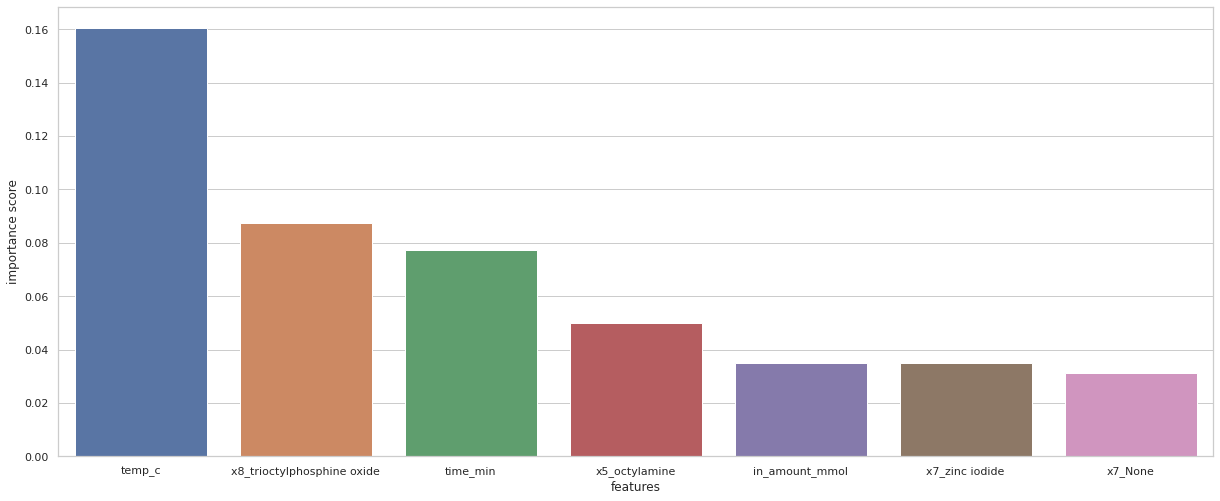

In [32]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [33]:
importance_dict_a

{'in_amount_mmol': 0.03502085759244984,
 'p_amount_mmol': 0.027977636523852,
 'sol_amount_ml': 0.01733197955085182,
 'TOP_amount_mmol': 0.01099672573144324,
 'acid_amount_mmol': 0.02289281511251226,
 'amine_amount_mmol': 0.01397816639616479,
 'thiol_amount_mmol': 0.02512067955477562,
 'zinc_amount_mmol': 0.03090953434781201,
 'other_amount_mmol': 0.009578661856812363,
 'total_volume_ml': 0.029255245418628888,
 'temp_c': 0.16034179765316162,
 'time_min': 0.07744180817991043,
 'x0_chloroindium oxalate': 0.004095133590926392,
 'x0_indium acetate': 0.006117911099630524,
 'x0_indium bromide': 7.432195235784418e-05,
 'x0_indium chloride': 0.003869975101685737,
 'x0_indium iodide': 0.006037567183179072,
 'x0_indium myristate': 0.0004879838590545184,
 'x0_indium oxalate': 0.017076227161031042,
 'x0_indium palmitate': 0.0036044374553934277,
 'x0_indium trifluoroacetate': 0.00019466972803127732,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 8.038490324

### Combine


In [34]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [35]:
sorted_d 

[('TOP_amount_mmol', 0.024226802836829812),
 ('acid_amount_mmol', 0.003563917412767123),
 ('amine_amount_mmol', 0.006491157604181191),
 ('in_amount_mmol', 0.035929734893865146),
 ('other_amount_mmol', 0.005966047399521015),
 ('p_amount_mmol', 0.027968062953970235),
 ('sol_amount_ml', 0.008196906774017335),
 ('temp_c', 0.1118500324443521),
 ('thiol_amount_mmol', 0.0),
 ('time_min', 0.31500062277847524),
 ('total_volume_ml', 0.023663021227667887),
 ('x0_chloroindium oxalate', 0.022219984064215104),
 ('x0_indium acetate', 0.00045569855814017745),
 ('x0_indium bromide', 0.000126685604463257),
 ('x0_indium chloride', 0.009353737601545675),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium oxalate', 0.0),
 ('x0_indium palmitate', 0.006244430529475978),
 ('x0_indium trifluoroacetate', 0.04679463909177305),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 1.1024814728379828e-05),
 ('x1_phosphine gas', 0.0),
 ('x1_phosphorus tric

In [36]:
combined_importance = dict()

In [37]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'TOP_amount_mmol': 0.28724740529224563,
 'acid_amount_mmol': 0.04006017467674822,
 'amine_amount_mmol': 0.05300146560586659,
 'in_amount_mmol': 0.10397184994896894,
 'other_amount_mmol': 0.04897880718505114,
 'p_amount_mmol': 0.0622726709585779,
 'sol_amount_ml': 0.04545756418237092,
 'temp_c': 0.45848209185763383,
 'thiol_amount_mmol': 0.02512067955477562,
 'time_min': 0.5127221345153372,
 'total_volume_ml': 0.07785333070458922,
 'x0_chloroindium oxalate': 0.026315117655141496,
 'x0_indium acetate': 0.01692120155099863,
 'x0_indium bromide': 0.0007023737532582586,
 'x0_indium chloride': 0.018723769981991763,
 'x0_indium iodide': 0.006037567183179072,
 'x0_indium myristate': 0.005854220396421604,
 'x0_indium oxalate': 0.017076227161031042,
 'x0_indium palmitate': 0.009849056150096222,
 'x0_indium trifluoroacetate': 0.04698930881980433,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 0.00016663550362727212,
 'x1_phosphine gas': 0.01317116033120

In [38]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.5127221345153372),
 ('temp_c', 0.45848209185763383),
 ('TOP_amount_mmol', 0.28724740529224563),
 ('x7_zinc chloride', 0.18215314577977193),
 ('zinc_amount_mmol', 0.12729542438976016),
 ('in_amount_mmol', 0.10397184994896894),
 ('x8_trioctylphosphine oxide', 0.087370043946599),
 ('total_volume_ml', 0.07785333070458922),
 ('x4_None', 0.06548422731253141),
 ('p_amount_mmol', 0.0622726709585779),
 ('x5_octylamine', 0.058145476221412175),
 ('amine_amount_mmol', 0.05300146560586659),
 ('x7_zinc oleate', 0.052879657618154274),
 ('other_amount_mmol', 0.04897880718505114),
 ('x3_trioctylphosphine', 0.047436979662720716),
 ('x0_indium trifluoroacetate', 0.04698930881980433),
 ('x7_zinc iodide', 0.04614225091673609),
 ('sol_amount_ml', 0.04545756418237092),
 ('x7_None', 0.042712156515129725),
 ('x8_copper bromide', 0.04080858736756549),
 ('acid_amount_mmol', 0.04006017467674822),
 ('x2_octadecene', 0.03848906830264448),
 ('x5_None', 0.03606525984933315),
 ('x8_water', 0.0333884600

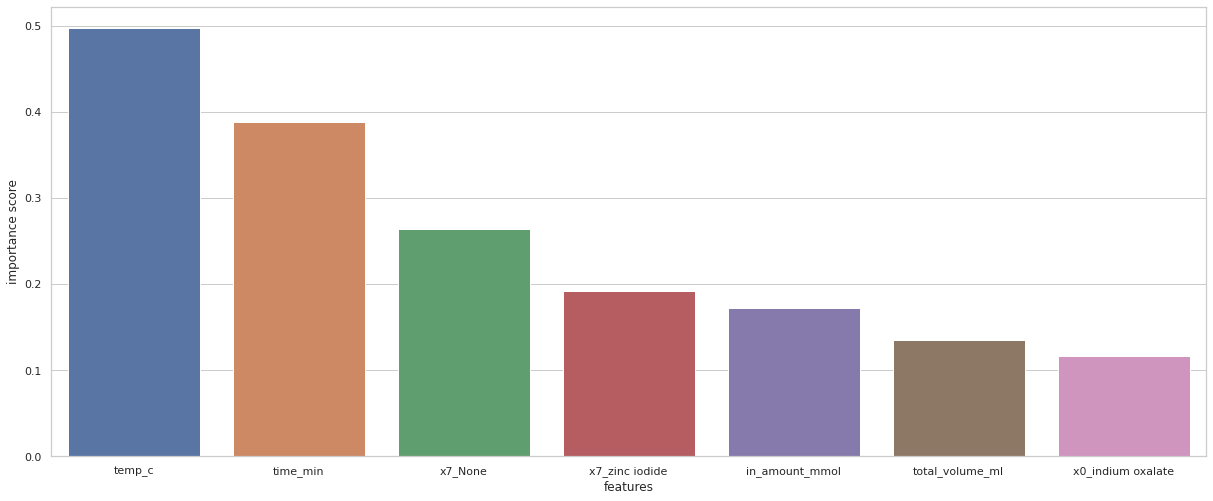

In [56]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)

## Correlation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
df["MEDV"] = x.target
X_cor = df.drop("MEDV",1)   #Feature Matrix
y_cor = df["MEDV"]          #Target Variable
df.head()